In [1]:
# Import the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [4]:
data.head() # shows first five values of the given data set

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail() # Gives last five values of the data set

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
# Sort the data set according to the date
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.reset_index(inplace=True) # it makes the index in order

In [8]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


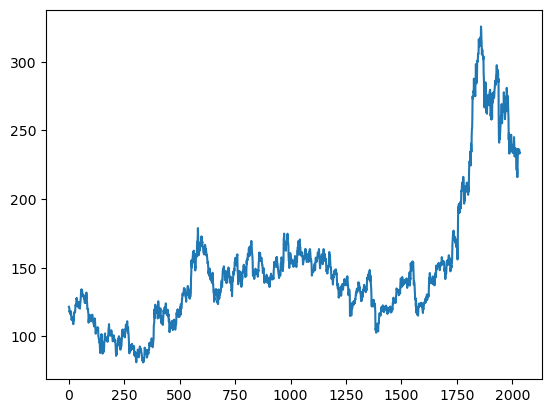

In [9]:
plt.plot(df['Close']) # Plots the graph at 'Close'

In [10]:
df1=df['Close']

In [11]:
# Feature Scalling
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [12]:
# Splitting the data into training and testing sets
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size
train_data = df1[0:training_size:]
test_data = df1[training_size:len(df1), :1]

In [13]:
training_size, test_size

(1424, 611)

In [14]:
# Convert the array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)- time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)       
        

In [15]:
time_step = 100
X_train, Y_train = datasetCrtd(train_data, time_step)
X_test, Y_test = datasetCrtd(test_data, time_step)

In [16]:
print(X_train.shape), print(Y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [17]:
# Reshape input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
# Building the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train, Y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 5s 128ms/step - loss: 0.0121 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 2s 89ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 2s 85ms/step - loss: 9.3225e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 2s 87ms/step - loss: 8.3023e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 2s 88ms/step - loss: 8.0567e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 2s 87ms/step - loss: 7.8357e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 2s 86ms/step - loss: 7.7003e-04 - val_loss: 9.9468e-04
Epoch 8/60
19/19 [==============================] - 2s 86ms/step - loss: 7.6996e-04 - val_loss: 9.6339e-04
Epoch 9/60
19/19 [==============================] - 2s 84ms/step - loss: 7.1439e-04 - val_loss: 9.2334e-04
Epoch 10/60
19/19 [==============================] - 2s 83ms/step - 

In [23]:
# Prediction of scaled test set
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 21ms/step


In [24]:
# Transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [25]:
test_predict1

array([[141.40157 ],
       [141.48843 ],
       [140.31787 ],
       [137.17896 ],
       [135.8099  ],
       [135.91269 ],
       [137.77582 ],
       [139.46391 ],
       [139.219   ],
       [138.16531 ],
       [137.74663 ],
       [139.44727 ],
       [140.48108 ],
       [142.287   ],
       [144.65157 ],
       [141.49995 ],
       [138.54068 ],
       [138.93321 ],
       [140.4497  ],
       [146.84055 ],
       [151.17247 ],
       [151.9901  ],
       [151.02086 ],
       [148.13734 ],
       [148.809   ],
       [149.51256 ],
       [150.48317 ],
       [152.48051 ],
       [152.70857 ],
       [152.00818 ],
       [152.2127  ],
       [150.71307 ],
       [146.92407 ],
       [140.64291 ],
       [138.01454 ],
       [138.2785  ],
       [138.99854 ],
       [137.62602 ],
       [134.27328 ],
       [129.79842 ],
       [127.53955 ],
       [127.12554 ],
       [125.25912 ],
       [124.7102  ],
       [122.44519 ],
       [119.50891 ],
       [119.12431 ],
       [119.1

In [31]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(Y_test, test_predict))  # MSE is low

0.053495829531874296